In [1]:
#Importing Packages

! pip install feature_engine

In [2]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_CSA = pd.read_excel("C:/Users/Sushant/OneDrive/Desktop/theforage/Project/Python/Customer Segmentation/Online Retail.xlsx")

In [4]:
#Check Dataset

df_CSA.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2021-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2021-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2021-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2021-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2021-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
df_CSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df_CSA.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2022-07-04 13:34:57.156386816       4.611114   
min    -80995.000000            2021-12-01 08:26:00  -11062.060000   
25%         1.000000            2022-03-28 11:34:00       1.250000   
50%         3.000000            2022-07-19 17:17:00       2.080000   
75%        10.000000            2022-10-19 11:27:00       4.130000   
max     80995.000000            2022-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

1. The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
2. The UnitPrice also have few negative values which is uncommon,these transactions could represent cancelled orders by customers or bad-debt incurred by the business.
3. Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.
4. We need to clean the above values by removing from the dataset.

In [7]:
df_CSA.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
df_CSA.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#Country

df_CSA.Country.value_counts(normalize=True)

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

In [10]:
df_CSA = df_CSA[df_CSA.Country == 'United Kingdom']

Removing the negative values from Quantity and UnitPrice

In [11]:
#Quantity

df_CSA = df_CSA[df_CSA.Quantity > 0]

In [12]:
#InvoiceDate

df_CSA['InvoiceDate'] = pd.to_datetime(df_CSA['InvoiceDate'])
df_CSA['InvoiceYearMonth'] = df_CSA['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_CSA['Date'] = df_CSA['InvoiceDate'].dt.strftime('%Y-%m')

In [13]:
#timebound

print(df_CSA["InvoiceDate"].min())
print(df_CSA["InvoiceDate"].max())
print("The data is from 1 year transaction")

2021-12-01 08:26:00
2022-12-09 12:49:00
The data is from 1 year transaction


In [14]:
#UnitPrice

df_CSA = df_CSA[df_CSA.UnitPrice > 0]

Removing the Null values from the data.

In [15]:
#CustomerID

df_CSA = df_CSA[pd.notnull(df_CSA['CustomerID'])]

In [16]:
df_CSA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 29.7+ MB


# Exploratory Data Analysis

How many product sold every month?

In [17]:
#Aggregating the Orders by Month

df_CSA_agg= df_CSA.groupby("Date").Quantity.sum()
df_CSA_agg.head()

Date
2021-12    267767
2022-01    278251
2022-02    213375
2022-03    276304
2022-04    260448
Name: Quantity, dtype: int64

In [18]:
#converting series to dataframe and resetting index.

df_CSA_agg=pd.DataFrame(df_CSA_agg)
df_CSA_agg=df_CSA_agg.reset_index()
df_CSA_agg.head()

Date  Quantity
0  2021-12    267767
1  2022-01    278251
2  2022-02    213375
3  2022-03    276304
4  2022-04    260448

In [19]:
def plot_df_CSA(df_CSA, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

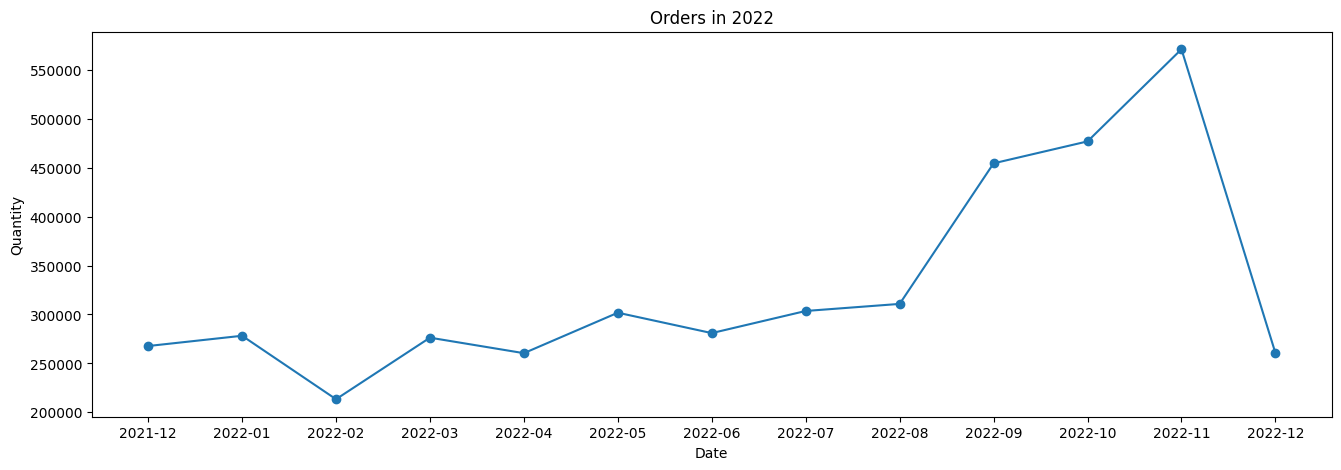

In [20]:
plot_df_CSA(df_CSA_agg, x=df_CSA_agg.Date, y=df_CSA_agg.Quantity,title='Orders in 2022')

How much customer spend their money every month?

In [21]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df_CSA['Revenue'] = df_CSA['Quantity']*df_CSA['UnitPrice']

<Axes: ylabel='Revenue'>

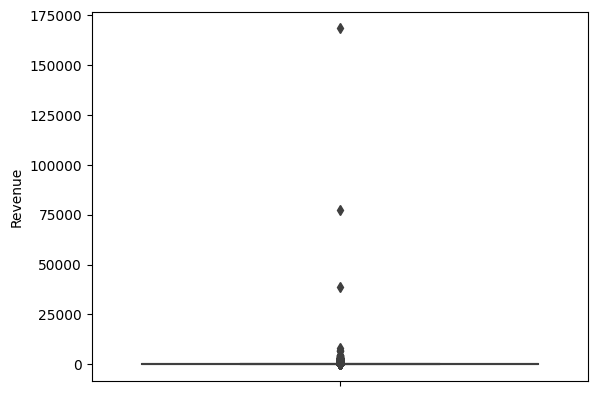

In [22]:
sns.boxplot(y=df_CSA['Revenue'])

In [23]:
df_CSA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
 10  Revenue           354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 32.4+ MB


In [24]:
#Monthly Revenue

df_CSA_revenue = df_CSA.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_CSA_revenue.head()

InvoiceYearMonth     Revenue
0            202112  498661.850
1            202201  442190.060
2            202202  355655.630
3            202203  467198.590
4            202204  409559.141

In [25]:
plot_data = [
    go.Scatter(
        x=df_CSA_revenue['InvoiceYearMonth'],
        y=df_CSA_revenue['Revenue'],
        mode='lines+markers')]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Revenue')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# RFM Analysis

Recency Frequency Monetary (RFM)

1. RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

2. Recency — how long it’s been since a customer bought something from us.

3. Frequency — how often a customer buys from us.

4. Monetary value — the total value of purchases a customer has made.

The last invoice date is 2011–12–09, we will use this date to calculate Recency.

In [26]:
NOW = dt.date(2022,12,9) 
df_CSA['Date'] = pd.DatetimeIndex(df_CSA.InvoiceDate).date

In [27]:
#Recency

df_CSA_recency = df_CSA.groupby(['CustomerID'],as_index=False)['Date'].max()
df_CSA_recency.columns = ['CustomerID','Last_Purchase_Date']

df_CSA_recency['Recency'] = df_CSA_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_CSA_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_CSA_recency.head()

CustomerID  Recency
0     12346.0      325
1     12747.0        2
2     12748.0        0
3     12749.0        3
4     12820.0        3

In [28]:
#Frequency - Monetarty

FM_Table = df_CSA.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x), 'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency','Revenue':'Monetary'},inplace= True)
FM_Table.head()

Frequency  Monetary
CustomerID                     
12346.0             1  77183.60
12747.0           103   4196.01
12748.0          4595  33719.73
12749.0           199   4090.88
12820.0            59    942.34

In [29]:
RFM_Table = df_CSA_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12747.0        2        103   4196.01
2     12748.0        0       4595  33719.73
3     12749.0        3        199   4090.88
4     12820.0        3         59    942.34

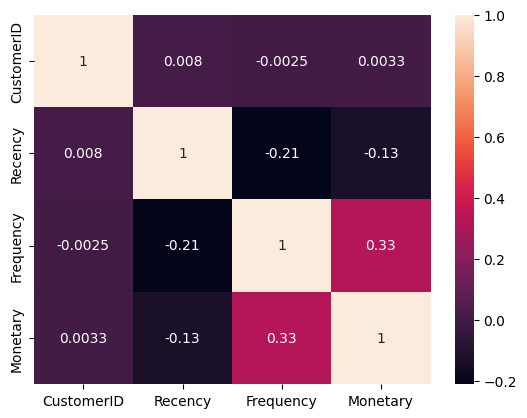

In [30]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

# Modeling Data: RFM Quantiles

1. Now we split the metrics into segments using quantiles.
2. We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively.
3. 1 is the highest value, and 4 is the lowest value.
4. A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [31]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [32]:
segmented_rfm = RFM_Table.copy()

In [33]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [34]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

CustomerID  Recency  Frequency  Monetary  R_quartile  F_quartile  \
0     12346.0      325          1  77183.60           4           4   
1     12747.0        2        103   4196.01           1           1   
2     12748.0        0       4595  33719.73           1           1   
3     12749.0        3        199   4090.88           1           1   
4     12820.0        3         59    942.34           1           2   

   M_quartile  
0           1  
1           1  
2           1  
3           1  
4           2

Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [35]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [36]:
segmented_rfm.head()

CustomerID  Recency  Frequency  Monetary  R_quartile  F_quartile  \
0     12346.0      325          1  77183.60           4           4   
1     12747.0        2        103   4196.01           1           1   
2     12748.0        0       4595  33719.73           1           1   
3     12749.0        3        199   4090.88           1           1   
4     12820.0        3         59    942.34           1           2   

   M_quartile RFM_Segment  
0           1         441  
1           1         111  
2           1         111  
3           1         111  
4           2         122

In [37]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [38]:
segmented_rfm.head()

CustomerID  Recency  Frequency  Monetary  R_quartile  F_quartile  \
0     12346.0      325          1  77183.60           4           4   
1     12747.0        2        103   4196.01           1           1   
2     12748.0        0       4595  33719.73           1           1   
3     12749.0        3        199   4090.88           1           1   
4     12820.0        3         59    942.34           1           2   

   M_quartile RFM_Segment  RFM_Score  
0           1         441          9  
1           1         111          3  
2           1         111          3  
3           1         111          3  
4           2         122          5

In [39]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


In [40]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [41]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [42]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Label
Others                  2135
Loyal Customers          571
Best Customers           409
Lost Cheap Customers     343
Big Spenders             273
Lost Customers           168
Almost Lost               21
Name: count, dtype: int64

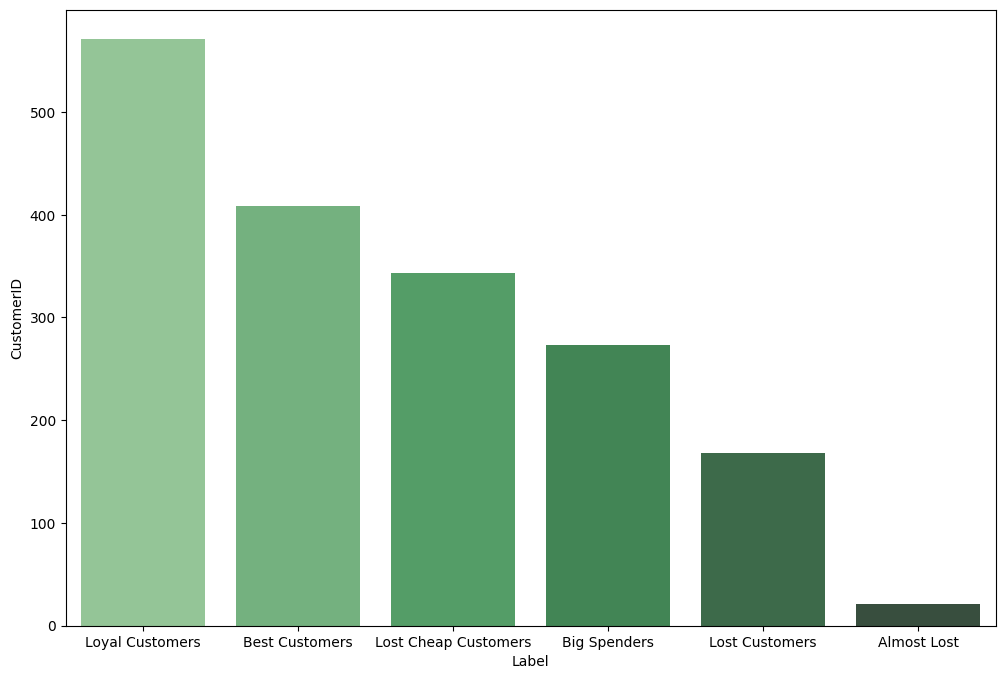

In [43]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

# Modeling Data: K-Means Clustering

K-Means clustering algorithm is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [44]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [45]:
RFM_Table_New.head()

Recency  Frequency  Monetary
0      325          1  77183.60
1        2        103   4196.01
2        0       4595  33719.73
3        3        199   4090.88
4        3         59    942.34

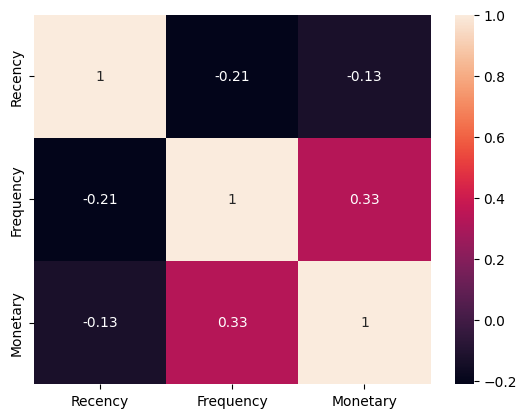

In [46]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

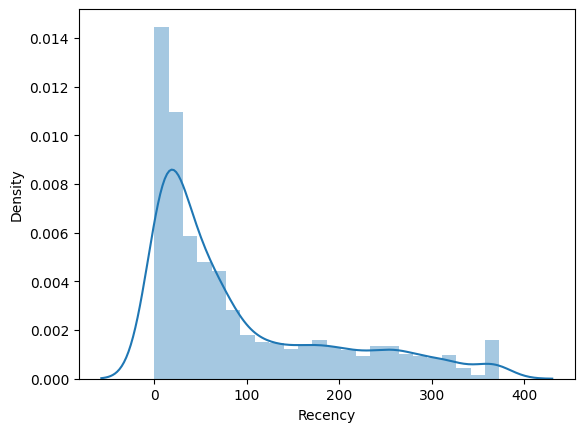

In [47]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

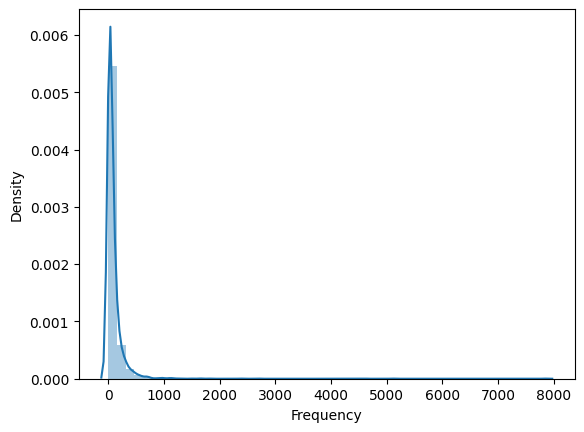

In [48]:
sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

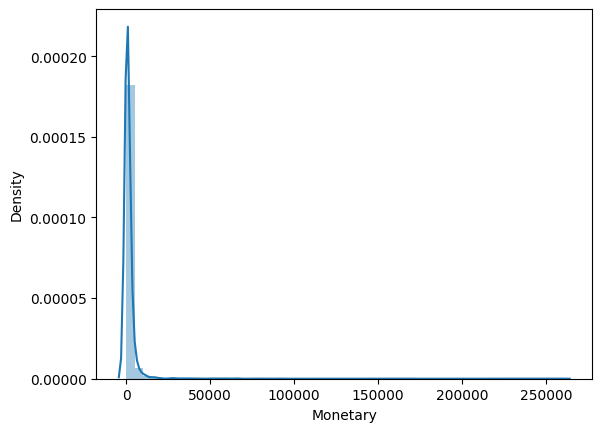

In [49]:
sns.distplot(RFM_Table_New['Monetary'])

K-means gives the best result under the following conditions:
1. Data’s distribution is not skewed.
2. Data is standardised.

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.

In [50]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

Recency  Frequency  Monetary
0      325          1  77183.60
1        2        103   4196.01
2        0       4595  33719.73
3        3        199   4090.88
4        3         59    942.34

In [51]:
df_rfm_log = np.log(df_rfm_log+1)

In [52]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [53]:
df_rfm_log = windsoriser.transform(df_rfm_log)

Once the skewness is reduced, I standardised the data by centring and scaling. Note all the variables now have a mean of 0 and a standard deviation of 1.

In [54]:
#Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [55]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

Recency  Frequency  Monetary
0  1.465314  -2.075553  2.144184
1 -2.017962   0.758501  1.551863
2 -2.065658   2.072989  2.144184
3 -1.804222   1.296773  1.530119
4 -1.804222   0.305737  0.272403

<Axes: xlabel='Recency', ylabel='Density'>

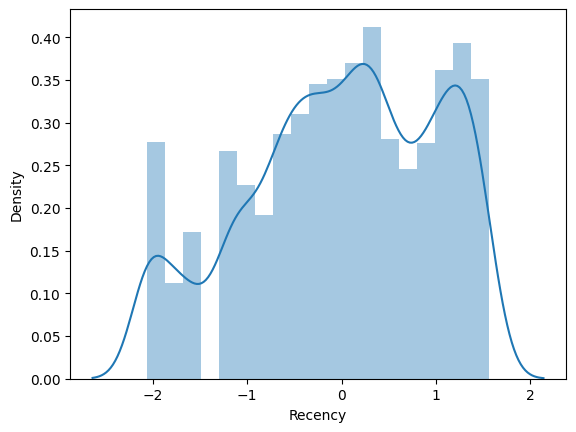

In [56]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

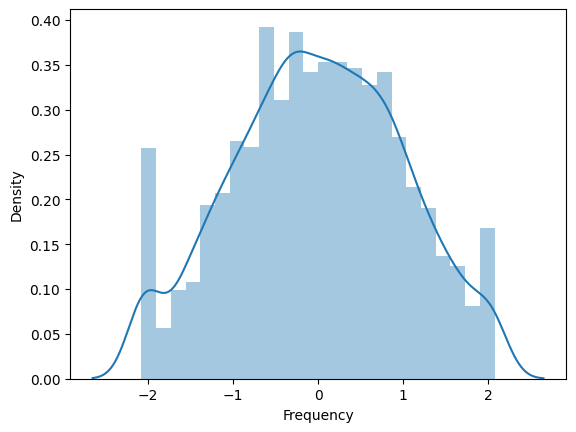

In [57]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

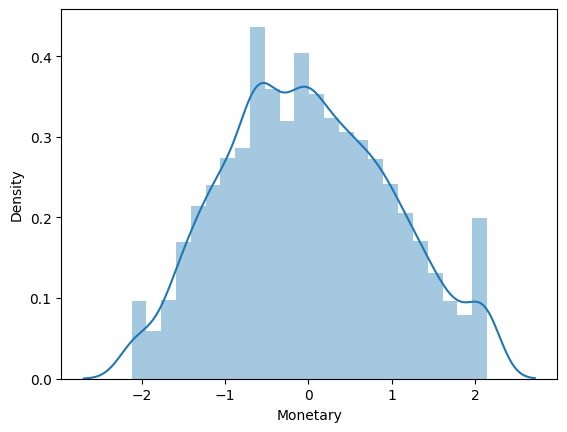

In [58]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

In [59]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [60]:
X = np.asarray(RFM_Table_New_scaled)

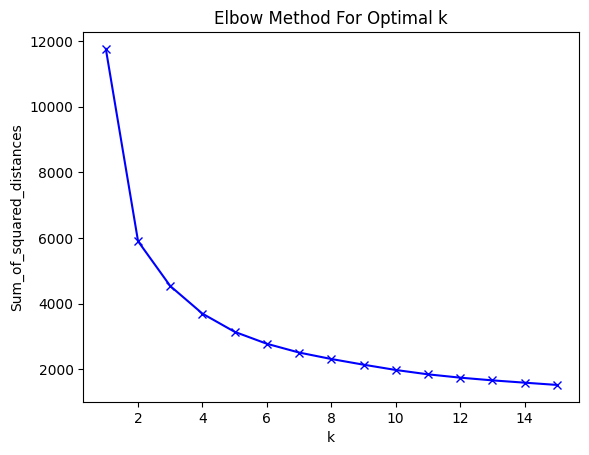

In [61]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [62]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

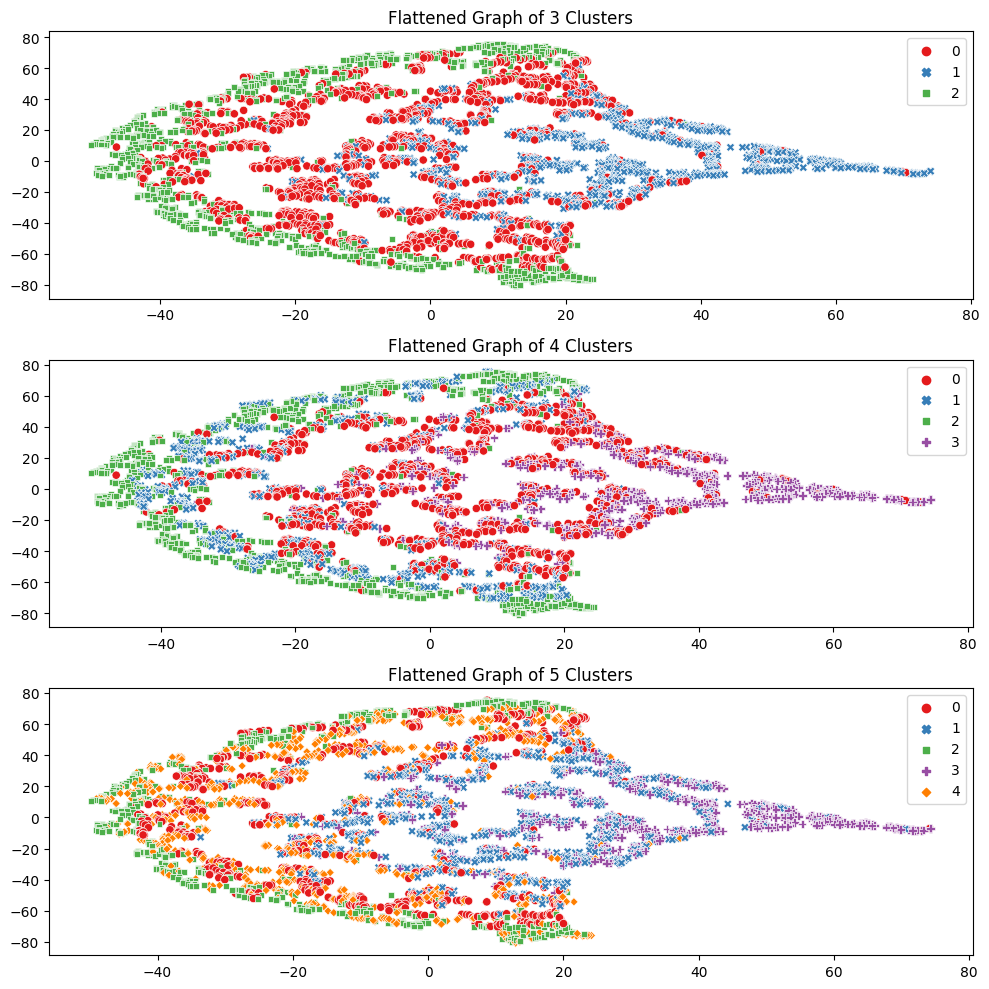

In [63]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()

In [64]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

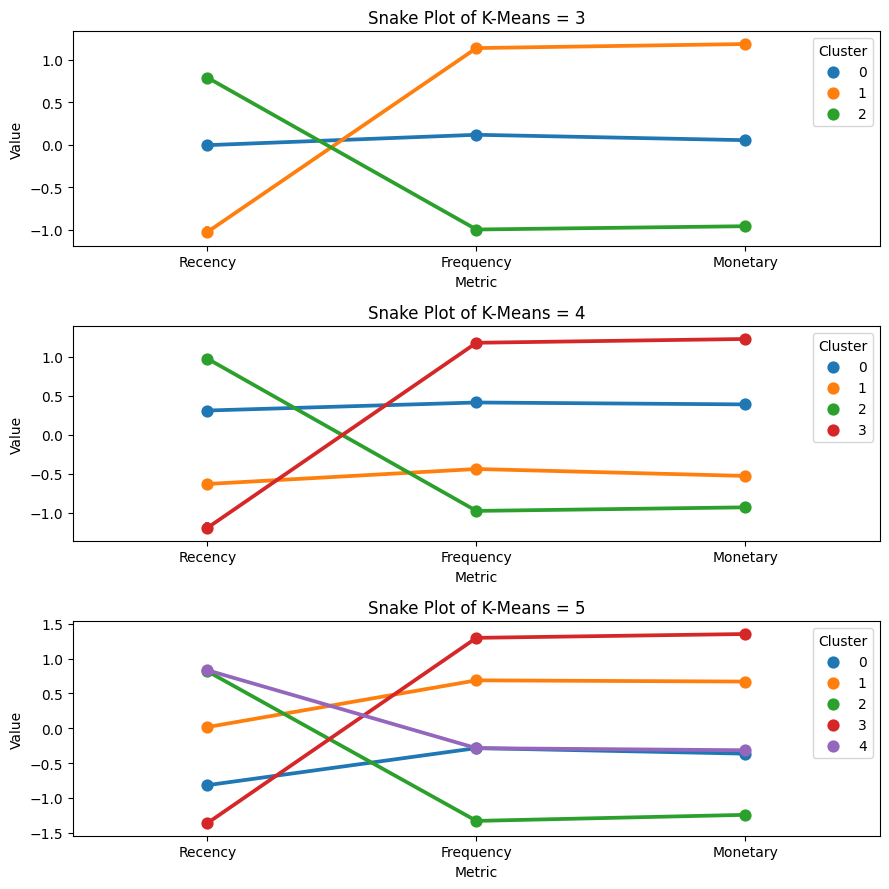

In [65]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

# # Evaluating Model: K-Means Clustering

Davies Bouldin Score is a metric for evaluating clustering algorithms.
The smaller Davies Bouldin Score is The more optimal the cluster.

K-Means = 3

In [66]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [67]:
print(davies_bouldin_score(X, kmeans.labels_))

1.122107795523453


In [68]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0651116702954282


In [70]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [71]:
print(davies_bouldin_score(X, kmeans.labels_))

1.068552867344011


In [72]:
df_rfm_k4.head()

CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      325          1  77183.60        0
1     12747.0        2        103   4196.01        3
2     12748.0        0       4595  33719.73        3
3     12749.0        3        199   4090.88        3
4     12820.0        3         59    942.34        3

In [73]:
df_rfm_k4.Cluster.value_counts()

Cluster
2    1173
0    1130
3     854
1     763
Name: count, dtype: int64

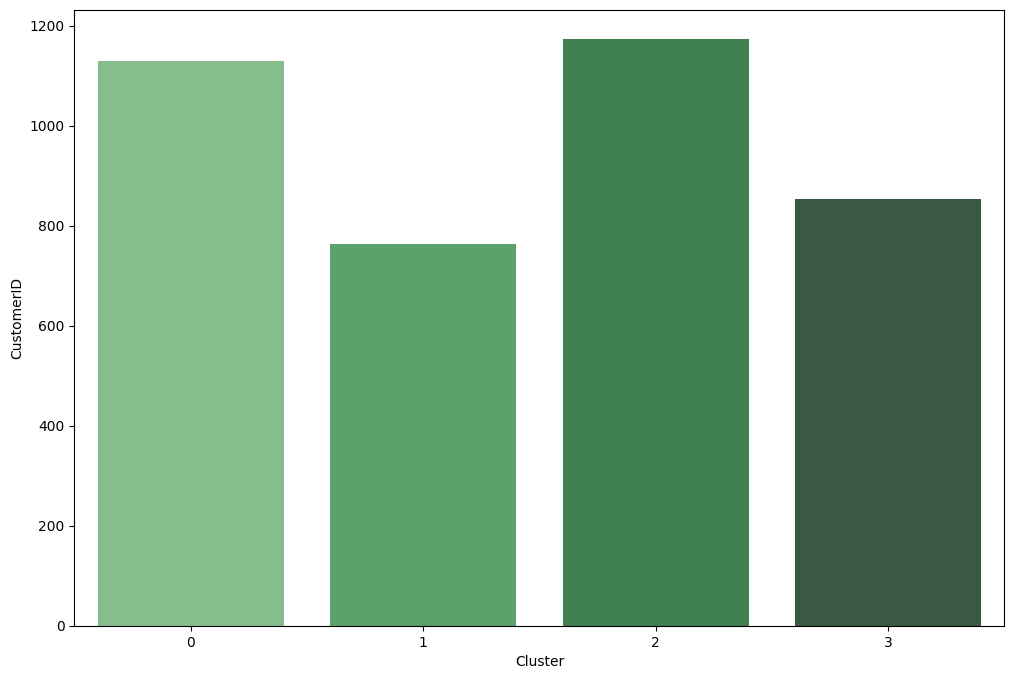

In [74]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

Interpretation of the clusters formed using k-means.

In [75]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']}).round(0)
    
    return df_new

In [76]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          89.0      81.0   1448.0  1130
1          24.0      30.0    463.0   763
2         197.0      15.0    293.0  1173
3          12.0     260.0   5825.0   854

- "Cluster 0" has 29% customers. It belongs to the "Loyal Customers" segment as they Haven’t purchased for some time, but used to purchase frequently (F=2) and spent a lot. (R=3, F=2, M=2)

- "Cluster 1" has 20% customers. It can be interpreted as "Alomost Lost". They purchase recently (R=2). However they do not purchase frequently and do not spent a lot. (R=2, F=3, M=3)

- "Cluster 2" has 30% customers. It can be interpreted as "Lost Cheap Customers". Their last purchase is long ago (R=4), purchased very few (F=4) and spent little (M=4). (R=4, F=4, M=4)

- "Cluster 3" has 21% customers. It belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1). (R=1, F=1, M=1)

# Recommendation

- Recommendation for “Best Customers" segment:
Focus on increasing customer purchases therefore it is necessary to form a cross/Up Selling Strategy.
- Recommendation for “Loyal Customers" segment:
The business team must optimize the budget campaign and the time campaign for this customer segment in order to maintain their loyalty and increase their value.
- Recommendation for “Almost Lost" segment:
This customer segment is very at risk for churn, so focus on activating customers and making repurchases by forming a Reactivation Strategy, Retention Strategy.
- Recommendation for “Lost Cheap Customers" segment:
This customer segment has churned, so the focus of the campaign is to reactivate the customer by forming a Reactivation strategy.
